<h2>1.	Получите данные и загрузите их в рабочую среду.<h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot

In [468]:
#Загружаем описание полей
desc = pd.read_csv('Descriм м м м м м м м    ммммммммммммммммммммммммption.csv')
desc

,Feature Name,Description
0,person_age,Age
1,person_income,Annual Income
2,personhomeownership,Home ownership
3,personemplength,Employment length (in years)
4,loan_intent,Loan intent
5,loan_grade,Loan grade
6,loan_amnt,Loan amount
7,loanintrate,Interest rate
8,loan_status,Loan status (0 is non default 1 is default)
9,loanpercentincome,Percent income


In [469]:
# загружаем данные
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [471]:
# Типы данных
print('Training data shape: ', data.shape)
data.dtypes.value_counts()

Training data shape:  (32581, 12)


int64      5
object     4
float64    3
dtype: int64

In [472]:
# Количество нулевых значений
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<h2>
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [473]:
#Удаляем строки, где есть NaN значения
df = data.dropna(how='any',axis=0)
#Количество нулевых значений после обработки
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [474]:
# Удаляем столбцы, содержащие категориальные переменные
df = df.select_dtypes(exclude=['object'])
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [475]:
# выбираем столбцы исходных данных
X=df.drop(columns=['loan_status'])
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4


In [476]:
X.shape

(28638, 7)

In [477]:
# задаем столбец целевой переменной
y=df['loan_status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [478]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [479]:
# разбиваем на обучающую (80% данных) и тестовую (20% данных) выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [480]:
#Определяем зависимость кредитного дефолта от исходных данных
LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = LR.predict(X_test)

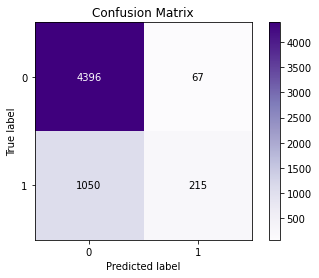

In [481]:
# Рассчитываем метрики качества
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    );

In [482]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики                  Значения')
print('Accuracy_score           : %.3f'%accuracy_score(y_test, y_pred))
print('Precision                : %.3f'%precision_score(y_test, y_pred))
print('Recall                   : %.3f'%recall_score(y_test, y_pred))
print('F1-Score                 : %.3f'%f1_score(y_test, y_pred))
print('ROC AUC                  : %.3f'%roc_auc_score(y_test, y_pred))

print('MAE                      : %.3f'%mean_absolute_error(y_test, y_pred))
print('MSE                      : %.3f'%mean_squared_error(y_test, y_pred))
print('RMSE                     : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))

print('r2_score                 : %.3f'%r2_score(y_test, y_pred))

Метрики                  Значения
Accuracy_score           : 0.805
Precision                : 0.762
Recall                   : 0.170
F1-Score                 : 0.278
ROC AUC                  : 0.577
MAE                      : 0.195
MSE                      : 0.195
RMSE                     : 0.442
r2_score                 : -0.133


In [483]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4463
           1       0.76      0.17      0.28      1265

    accuracy                           0.80      5728
   macro avg       0.78      0.58      0.58      5728
weighted avg       0.80      0.80      0.75      5728



<h2>3. Снова загрузите полные данные. <h2>

In [484]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<h2>4.	Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.<h2>

In [485]:
# Рассмотрим таблицу корреляций
correlation_matrix = data.corr(method='pearson').round(2)
correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.00,0.17,0.16,0.05,0.01,-0.02,-0.04,0.86
person_income,0.17,1.00,0.13,0.27,0.00,-0.14,-0.25,0.12
person_emp_length,0.16,0.13,1.00,0.11,-0.06,-0.08,-0.05,0.14
loan_amnt,0.05,0.27,0.11,1.00,0.15,0.11,0.57,0.04
loan_int_rate,0.01,0.00,-0.06,0.15,1.00,0.34,0.12,0.02
loan_status,-0.02,-0.14,-0.08,0.11,0.34,1.00,0.38,-0.02
loan_percent_income,-0.04,-0.25,-0.05,0.57,0.12,0.38,1.00,-0.03
cb_person_cred_hist_length,0.86,0.12,0.14,0.04,0.02,-0.02,-0.03,1.00


In [486]:
# Исходя из полученных данных удалим столбец:
# cb_person_cred_hist_length - из-за высокой корреляции с возрастом и практически отсутствии связи с  целевой переменной loan_status
data=data.drop(columns=['cb_person_cred_hist_length'])

<h2>5.	Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.<h2>

In [487]:
#Количество нулевых значений
data.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                3116
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
dtype: int64

In [488]:
#Удаляем строки где есть NaN значения
data2 = data.dropna(how='any',axis=0)
# a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
f'{round(data2.shape[0]/data.shape[0]*100,1)} %'

'87.9 %'

In [ ]:
# b) Заполните пропуски: 

# справочно константа и случайное число.
#data = data.fillna(100)
#data["person_emp_length"].fillna(lambda x: random.choice(data[data[person_emp_length] != np.nan]["person_emp_length"]), inplace =True)
#data[cols]=data[cols].fillna(data.mode().iloc[0])

# заменяем отсутствующие значения person_emp_length и loan_int_rate Cредним значением
cols = list(data)
data2[cols]=data2[cols].fillna(data2.mean().iloc[0])

In [490]:
data2.isnull().sum()

person_age                   0
person_income                0
person_home_ownership        0
person_emp_length            0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [491]:
data2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


<h2>6.	Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.<h2>

In [492]:
data2 = pd.get_dummies(data2, columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'] )
data2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,0,0,0,...,0,0,0,1,0,0,0,0,0,1


<h2>7.	Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
<h2>

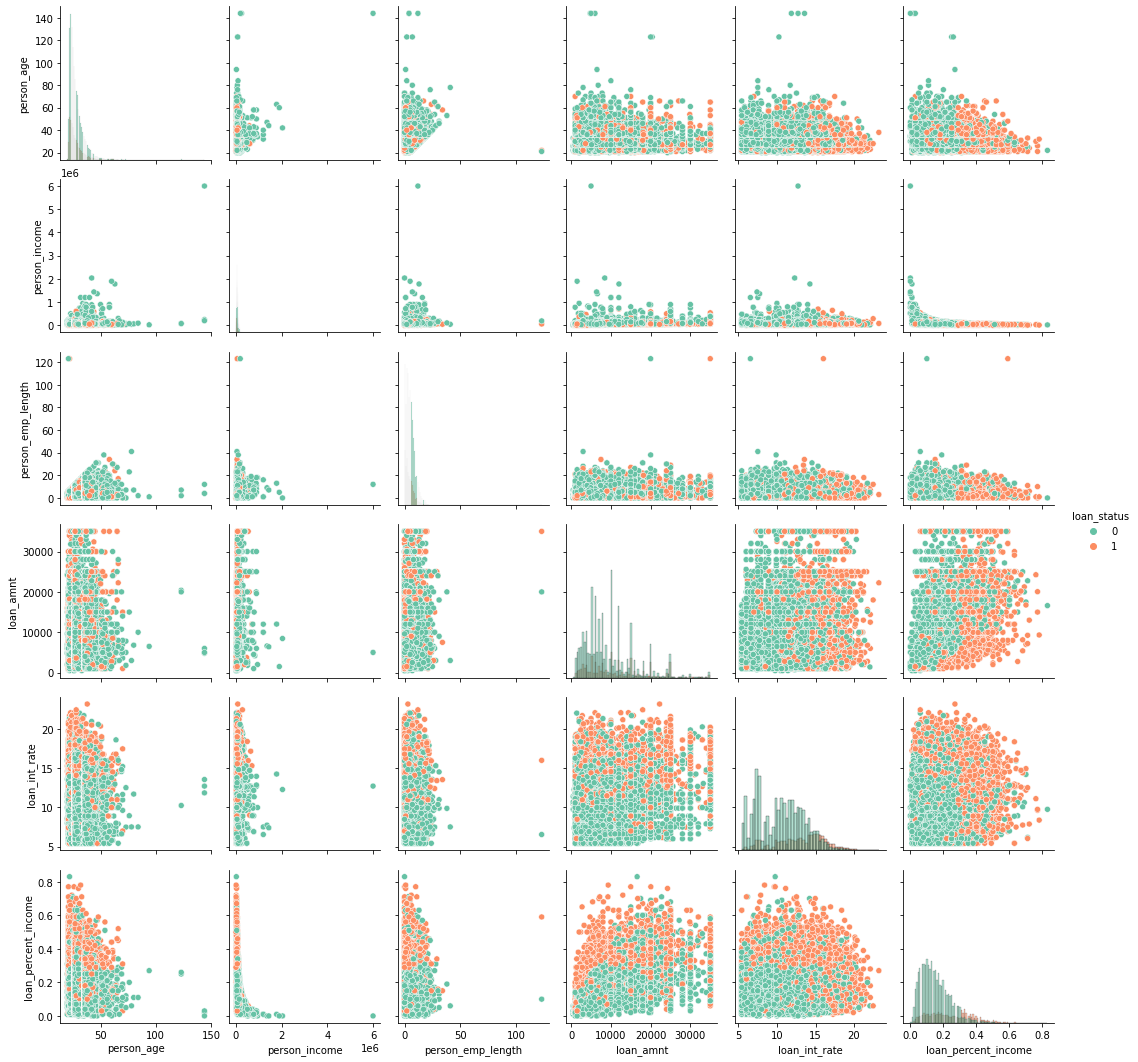

In [374]:
# Для удаления выбросов рассмотрим графики распределения
sns.pairplot(data, hue="loan_status", diag_kind="hist",palette='Set2')#, kind="kde")

In [493]:
# просмотр уникальных значений кроме дохода и размера займа
df2=df.drop(columns=['person_income','loan_amnt'], axis=1)
for col in df2:
    print(col,df2[col].unique())

person_age [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  50  37  39  40  43  41  46  38  47  42  44  48  45  49  58  65  51
  53  66  57  59  62  54  60  55  52  61  64  70  78  69  56  73  63  80
  84  76  67]
person_emp_length [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  11.  18.
  12.  17.  14.  16.  13.  19.  15.  22.  20.  21.  24.  23.  26.  25.
  27.  31.  28.  41.  34.  29.  38.  30.]
loan_int_rate [16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89 17.99
 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58 15.7
 15.99 14.84 14.42  6.99 13.61  9.91 13.48 12.98 13.57 15.68 13.06 15.62
 11.71  8.88 12.18 13.99 12.73 11.49 19.91 11.83 14.59  9.64 16.35 18.67
 10.08 10.36 12.23 16.07 14.22 14.79 13.22 11.86 13.43 15.28 17.93  9.25
 10.62 18.43 11.36 15.65 13.04

In [494]:
# удалим выбросы из 3 полей
df2 = data2[(data2.person_age < 120 ) & (data2.person_income < 6.000000e+06 ) & (data2.person_emp_length < 123.0 )]
data2.shape, df2.shape

((28638, 26), (28632, 26))

In [495]:
#Нормализуем данные
#df2=(df2-df2.min())/(df2.max()-df2.min())
#df2

<h2>8.*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)<h2>

<AxesSubplot:>

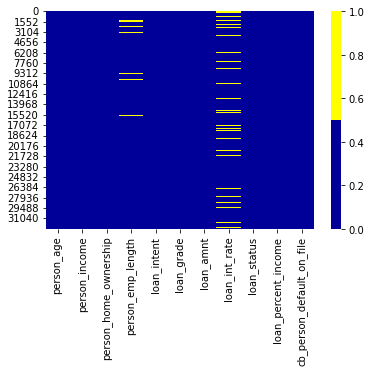

In [496]:
# Построим карту пропущенных значений (для оценки распределения null значений)
colours = ['#000099', '#ffff00'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

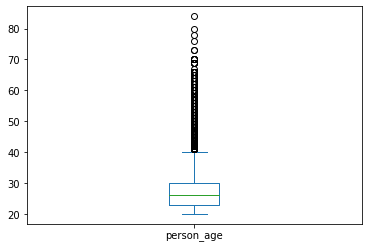

In [497]:
# Сформируем блочную диаграмму на примере возраста (для оценки выбросов)
df2['person_age'].plot(kind='box')
plt.show()

<h2>9.*Попробуйте математически преобразовать признак Age.
<h2> 10.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.<h2>

In [498]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [499]:
# оставляем столбцы исходных данных. 
X2=df2.drop(columns=['loan_status'])

In [500]:
# задаем столбец целевой переменной
y2=df2['loan_status']
y2.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

In [501]:
# разбиваем на обучающую (80% данных) и тестовую (20% данных) выборку
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [502]:
#Определяем зависимость кредитного дефолта от исходных данных
LR2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)
y_pred2 = LR2.predict(X_test2)

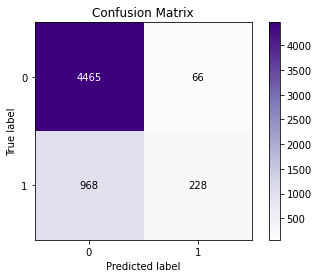

In [503]:
# Рассчитываем метрики качества
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test2, y_pred2,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    );

In [504]:
# сравним метрики качества 2 моделей:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики                  Было / Стало')
print('Accuracy_score           : %.3f'%accuracy_score(y_test, y_pred), '/ %.3f'%accuracy_score(y_test2, y_pred2))
print('Precision                : %.3f'%precision_score(y_test, y_pred), '/ %.3f'%precision_score(y_test2, y_pred2))
print('Recall                   : %.3f'%recall_score(y_test, y_pred), '/ %.3f'%recall_score(y_test2, y_pred2))
print('F1-Score                 : %.3f'%f1_score(y_test, y_pred), '/ %.3f'%f1_score(y_test2, y_pred2))
print('ROC AUC                  : %.3f'%roc_auc_score(y_test, y_pred), '/ %.3f'%roc_auc_score(y_test2, y_pred2))

print('MAE                      : %.3f'%mean_absolute_error(y_test, y_pred), '/ %.3f'%mean_absolute_error(y_test2, y_pred2))
print('MSE                      : %.3f'%mean_squared_error(y_test, y_pred), '/ %.3f'%mean_squared_error(y_test2, y_pred2))
print('RMSE                     : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)), '/ %.3f'%np.sqrt(mean_squared_error(y_test2, y_pred2)))

print('r2_score                 : %.3f'%r2_score(y_test, y_pred), '/ %.3f'%r2_score(y_test2, y_pred2))

Метрики                  Было / Стало
Accuracy_score           : 0.805 / 0.819
Precision                : 0.762 / 0.776
Recall                   : 0.170 / 0.191
F1-Score                 : 0.278 / 0.306
ROC AUC                  : 0.577 / 0.588
MAE                      : 0.195 / 0.181
MSE                      : 0.195 / 0.181
RMSE                     : 0.442 / 0.425
r2_score                 : -0.133 / -0.093


<h2>11.	Сформулируйте выводы по проделанной работе.
<h3>a) Кратко опишите какие преобразования были сделаны и почему.

Для повышения точности прогноза и устранения ошибок проведена замена отсутствующих значений в данных. Удалены выбросы по 3 признакам (при этом их количество незначительное - всего 6 строк). Категориальные переменные преобразованы в числовые. 

<h3>b) Сравните метрики моделей из п. 2 и п. 10.

После обработки данных результаты улучшились, но не значительно. В тоже время полученные метрики нельзя назвать удовлетворительными. Например, ROC AUC составил менее 0.6, а по матрице ошибок не угаданы 975 положительных ответов. Больший эффект позволит получить нормализация данных (ROC AUC составит 0.74)  Для улучшения результатов можно применить другие алгоритмы классификации, а также расмотреть дополнительные способы преобразования признаков.

<h3>c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Поскольку качество данных не вседа бывает идеальным, а также для выделения ключевых признаков - необходима обработка данных. Особое внимание следует уделять методам обработки, которые затрагивают большую часть значений, так как это оказывает в последствии значительное влияние на результат (в частности удаление и преобразование признаков). Для избежания ошибок в прогнозе целесообразно также проводить факторный (комплексный) анализ использования различных способов обработки данных.  